<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/LinearPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [3]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

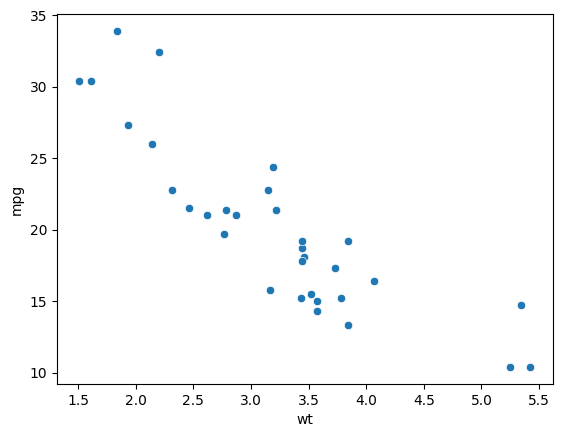

In [9]:
sns.scatterplot(x='wt', y='mpg', data=cars)


<Axes: xlabel='wt', ylabel='mpg'>

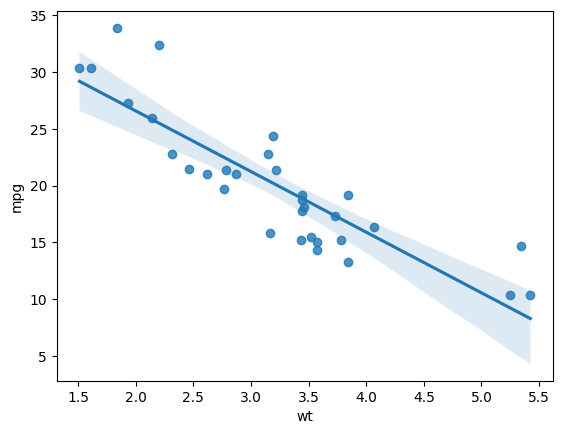

In [10]:
sns.regplot(x='wt', y='mpg', data=cars)


In [17]:
X_np=cars['wt'].to_numpy(dtype=np.float32).reshape(-1,1)
y_np=cars['mpg'].to_numpy(dtype=np.float32).reshape(-1,1)

In [15]:
X_np.shape

(32,)

In [18]:
X_torch=torch.tensor(X_np)
y_torch=torch.tensor(y_np)

In [60]:
w=torch.rand(1,requires_grad=True,dtype=torch.float32)
b=torch.rand(1,requires_grad=True,dtype=torch.float32)
epoch=1000
lr=0.01
for i in range(epoch):
  for j in range(len(X_torch)):
    y_pred=X_torch[j]*w+b
    loss=torch.pow(y_pred-y_torch[j],2)
    loss.backward()
    with torch.no_grad():
      w-=lr*w.grad
      b-=lr*b.grad
      w.grad.zero_()
      b.grad.zero_()
y_pred=X_torch*w+b
loss=torch.mean((y_pred-y_torch)**2)
print(loss.item())

11.201258659362793


In [68]:
w=torch.rand(1,requires_grad=True,dtype=torch.float32)
b=torch.rand(1,requires_grad=True,dtype=torch.float32)
epoch=1000
lr=0.001
for i in range(epoch):
  for j in range(len(X_torch)):
    y_pred=X_torch[j]*w+b
    loss=torch.pow(y_pred-y_torch[j],3)
    loss.backward()
    with torch.no_grad():
      torch.nn.utils.clip_grad_norm_([w, b], 1.0)  # Clip gradients to norm 1.0
      w-=lr*w.grad
      b-=lr*b.grad
      w.grad.zero_()
      b.grad.zero_()
y_pred=X_torch*w+b
loss=torch.mean((y_pred-y_torch)**2)
print(loss.item())

16549.765625


In [69]:
w=torch.rand(1,requires_grad=True,dtype=torch.float32)
b=torch.rand(1,requires_grad=True,dtype=torch.float32)
epoch=1000
lr=0.001
for i in range(epoch):
  for j in range(len(X_torch)):
    y_pred=X_torch[j]*w+b
    loss=torch.pow(y_pred-y_torch[j],1)
    loss.backward()
    with torch.no_grad():
      w-=lr*w.grad
      b-=lr*b.grad
      w.grad.zero_()
      b.grad.zero_()
y_pred=X_torch*w+b
loss=torch.mean((y_pred-y_torch)**2)
print(loss.item())

153119.796875


In [70]:
w=torch.rand(1,requires_grad=True,dtype=torch.float32)
b=torch.rand(1,requires_grad=True,dtype=torch.float32)
epoch=1000
lr=0.01
for i in range(epoch):
  for j in range(len(X_torch)):
    y_pred=X_torch[j]*w+b
    loss=torch.pow(y_pred-y_torch[j],1)
    loss.backward()
    with torch.no_grad():
      w-=lr*w.grad
      b-=lr*b.grad
      w.grad.zero_()
      b.grad.zero_()
y_pred=X_torch*w+b
loss=torch.mean((y_pred-y_torch)**2)
print(loss.item())

14292448.0


In [71]:
w=torch.rand(1,requires_grad=True,dtype=torch.float32)
b=torch.rand(1,requires_grad=True,dtype=torch.float32)
epoch=1000
lr=0.01
for i in range(epoch):
  for j in range(len(X_torch)):
    y_pred=X_torch[j]*w+b
    loss=torch.abs(y_pred-y_torch[j])
    loss.backward()
    with torch.no_grad():
      w-=lr*w.grad
      b-=lr*b.grad
      w.grad.zero_()
      b.grad.zero_()
y_pred=X_torch*w+b
loss=torch.mean((y_pred-y_torch)**2)
print(loss.item())

9.641570091247559


In [73]:
import torch.nn as nn

In [78]:
class LinearRegresionTorch(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
    self.relu=nn.ReLU()
    self.sigmoid=nn.Sigmoid()
    self.tanh=nn.Tanh()
  def forward(self,x):
    return self.linear(x)

In [100]:
input_size=1
output_size=1
model=LinearRegresionTorch(input_size,output_size)
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.02)

In [104]:
losses,slope,bias=[],[],[]
num_epochs=1000
for i in range(num_epochs):
  optimizer.zero_grad()
  y_pred=model(X_torch)
  l=loss(y_pred,y_torch)
  l.backward()
  optimizer.step()
  losses.append(l.item())
  slope.append(model.linear.weight.item())
  bias.append(model.linear.bias.item())
  if i%100==0:
    print(f'epoch {i} loss {l.item()}')

epoch 0 loss 8.941789627075195
epoch 100 loss 8.830398559570312
epoch 200 loss 8.76981258392334
epoch 300 loss 8.736859321594238
epoch 400 loss 8.718936920166016
epoch 500 loss 8.709189414978027
epoch 600 loss 8.703886985778809
epoch 700 loss 8.701001167297363
epoch 800 loss 8.699433326721191
epoch 900 loss 8.698579788208008


<Axes: xlabel='wt', ylabel='mpg'>

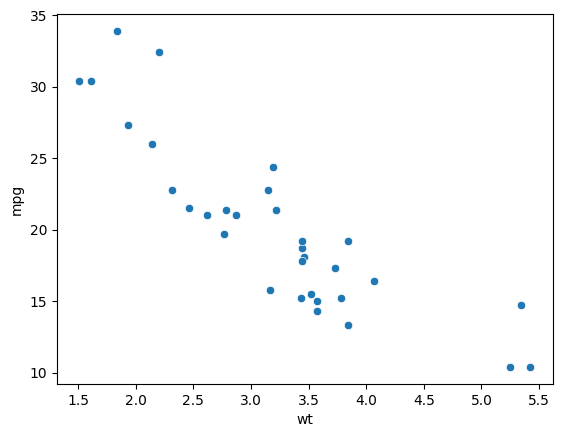

In [102]:
sns.scatterplot(x='wt', y='mpg', data=cars)

<Axes: xlabel='wt', ylabel='mpg'>

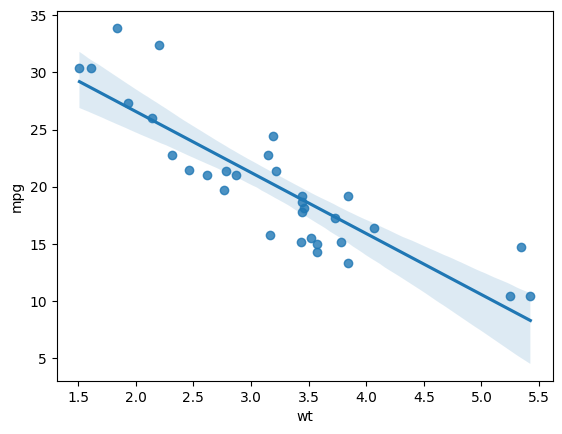

In [103]:
sns.regplot(x='wt', y='mpg', data=cars)

<Axes: >

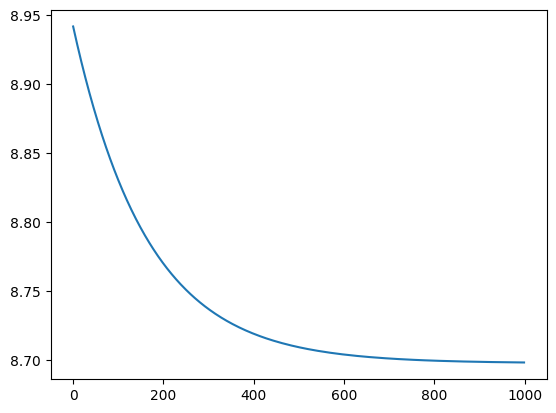

In [105]:
sns.lineplot(x=range(num_epochs),y=losses)

<Axes: >

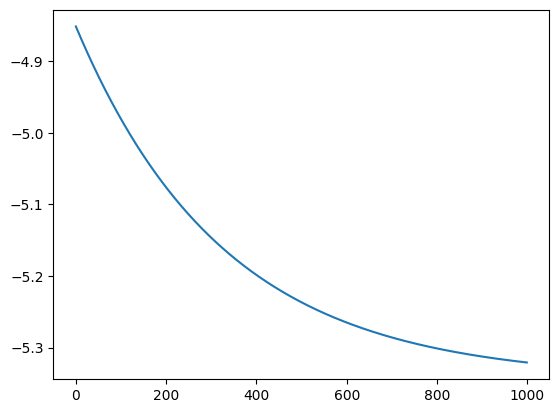

In [106]:
sns.lineplot(x=range(num_epochs),y=slope)

<Axes: >

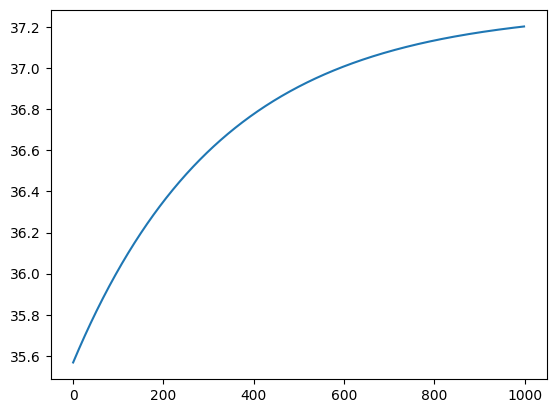

In [107]:
sns.lineplot(x=range(num_epochs),y=bias)

In [109]:
input_size=1
output_size=1
model=LinearRegresionTorch(input_size,output_size)
loss=nn.L1Loss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.02)
losses,slope,bias=[],[],[]
num_epochs=1000
for i in range(num_epochs):
  optimizer.zero_grad()
  y_pred=model(X_torch)
  l=loss(y_pred,y_torch)
  l.backward()
  optimizer.step()
  losses.append(l.item())
  slope.append(model.linear.weight.item())
  bias.append(model.linear.bias.item())
  if i%100==0:
    print(f'epoch {i} loss {l.item()}')

epoch 0 loss 17.380523681640625
epoch 100 loss 8.135297775268555
epoch 200 loss 7.965907096862793
epoch 300 loss 7.887213706970215
epoch 400 loss 7.808520317077637
epoch 500 loss 7.729825496673584
epoch 600 loss 7.651220321655273
epoch 700 loss 7.572525978088379
epoch 800 loss 7.493836402893066
epoch 900 loss 7.415146827697754


In [112]:
input_size=1
output_size=1
model=LinearRegresionTorch(input_size,output_size)
loss=nn.SmoothL1Loss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.02)
losses,slope,bias=[],[],[]
num_epochs=1000
for i in range(num_epochs):
  optimizer.zero_grad()
  y_pred=model(X_torch)
  l=loss(y_pred,y_torch)
  l.backward()
  optimizer.step()
  losses.append(l.item())
  slope.append(model.linear.weight.item())
  bias.append(model.linear.bias.item())
  if i%100==0:
    print(f'epoch {i} loss {l.item()}')

epoch 0 loss 16.11312484741211
epoch 100 loss 7.509147644042969
epoch 200 loss 7.37989616394043
epoch 300 loss 7.30253267288208
epoch 400 loss 7.225400447845459
epoch 500 loss 7.148438930511475
epoch 600 loss 7.071646213531494
epoch 700 loss 6.995021343231201
epoch 800 loss 6.918565273284912
epoch 900 loss 6.842275619506836


In [117]:
input_size=1
output_size=1
model=LinearRegresionTorch(input_size,output_size)
loss=nn.SmoothL1Loss()
optimizer=torch.optim.AdamW(model.parameters(),lr=0.02)
losses,slope,bias=[],[],[]
num_epochs=1000
for i in range(num_epochs):
  optimizer.zero_grad()
  y_pred=model(X_torch)
  l=loss(y_pred,y_torch)
  l.backward()
  optimizer.step()
  losses.append(l.item())
  slope.append(model.linear.weight.item())
  bias.append(model.linear.bias.item())
  if i%100==0:
    print(f'epoch {i} loss {l.item()}')

epoch 0 loss 17.83415412902832
epoch 100 loss 10.470369338989258
epoch 200 loss 7.369468688964844
epoch 300 loss 7.085086822509766
epoch 400 loss 6.9725847244262695
epoch 500 loss 6.852636814117432
epoch 600 loss 6.721016883850098
epoch 700 loss 6.578719139099121
epoch 800 loss 6.426440715789795
epoch 900 loss 6.2648138999938965


In [120]:
input_size=1
output_size=1
model=LinearRegresionTorch(input_size,output_size)
loss=nn.SmoothL1Loss()
optimizer=torch.optim.AdamW(model.parameters(),lr=0.19)
losses,slope,bias=[],[],[]
num_epochs=1000
for i in range(num_epochs):
  optimizer.zero_grad()
  y_pred=model(X_torch)
  l=loss(y_pred,y_torch)
  l.backward()
  optimizer.step()
  losses.append(l.item())
  slope.append(model.linear.weight.item())
  bias.append(model.linear.bias.item())
  if i%100==0:
    print(f'epoch {i} loss {l.item()}')

epoch 0 loss 19.619476318359375
epoch 100 loss 6.28804349899292
epoch 200 loss 4.834805488586426
epoch 300 loss 3.3043437004089355
epoch 400 loss 2.3731689453125
epoch 500 loss 2.045994520187378
epoch 600 loss 1.9884979724884033
epoch 700 loss 1.97188138961792
epoch 800 loss 1.9603016376495361
epoch 900 loss 1.9507505893707275


<Axes: >

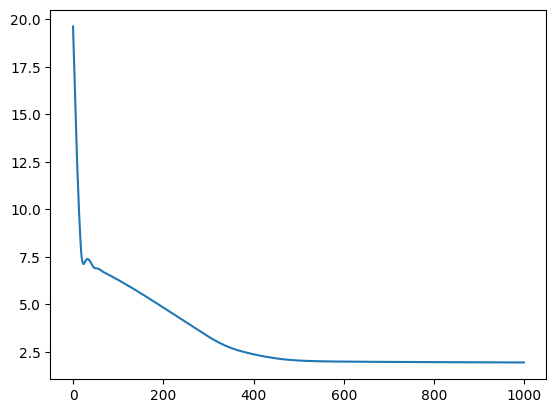

In [121]:
sns.lineplot(x=range(num_epochs),y=losses)

<Axes: xlabel='wt', ylabel='mpg'>

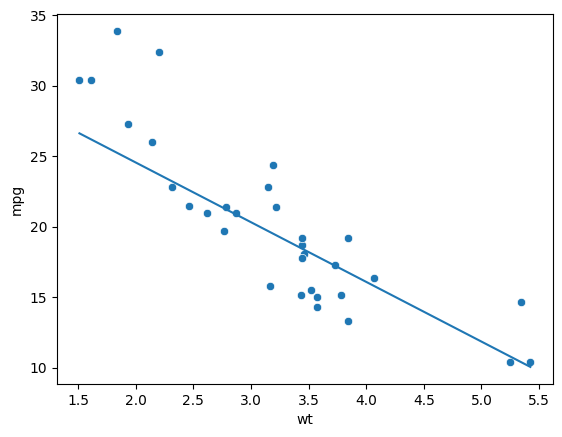

In [132]:
sns.lineplot(x=np.array(X_torch.numpy().flatten()),y=np.array(model(X_torch).detach().numpy().flatten()))
sns.scatterplot(x='wt', y='mpg', data=cars)

In [133]:
BATCH_SIZE=10
input_size=1
output_size=1
model=LinearRegresionTorch(input_size,output_size)
loss=nn.SmoothL1Loss()
optimizer=torch.optim.AdamW(model.parameters(),lr=0.19)
losses,slope,bias=[],[],[]
num_epochs=1000
for i in range(num_epochs):
  for i in range(0,len(X_torch),BATCH_SIZE):
    y_pred=model(X_torch[i:i+BATCH_SIZE])
    optimizer.zero_grad()
    y_pred=model(X_torch[i:i+BATCH_SIZE])
    l=loss(y_pred,y_torch[i:i+BATCH_SIZE])
    l.backward()
    optimizer.step()
    losses.append(l.item())
    slope.append(model.linear.weight.item())
    bias.append(model.linear.bias.item())
    if i%100==0:
      print(f'epoch {i} loss {l.item()}')

epoch 0 loss 19.886150360107422
epoch 0 loss 16.76619529724121
epoch 0 loss 13.673556327819824
epoch 0 loss 10.679668426513672
epoch 0 loss 7.834545135498047
epoch 0 loss 5.633452415466309
epoch 0 loss 4.144164085388184
epoch 0 loss 3.5583672523498535
epoch 0 loss 3.4276206493377686
epoch 0 loss 3.4121253490448
epoch 0 loss 3.468644618988037
epoch 0 loss 3.632063388824463
epoch 0 loss 3.9521255493164062
epoch 0 loss 4.327357292175293
epoch 0 loss 4.6125078201293945
epoch 0 loss 4.748883247375488
epoch 0 loss 4.746598720550537
epoch 0 loss 4.647144317626953
epoch 0 loss 4.499309539794922
epoch 0 loss 4.3514204025268555
epoch 0 loss 4.233861923217773
epoch 0 loss 4.1562018394470215
epoch 0 loss 4.116004943847656
epoch 0 loss 4.104231834411621
epoch 0 loss 4.1091742515563965
epoch 0 loss 4.1195220947265625
epoch 0 loss 4.126500606536865
epoch 0 loss 4.124947547912598
epoch 0 loss 4.113314628601074
epoch 0 loss 4.092872619628906
epoch 0 loss 4.066474914550781
epoch 0 loss 4.03738260269165


In [134]:
torch.mean(torch.square(model(X_torch)-y_torch))

tensor(12.1423, grad_fn=<MeanBackward0>)

In [135]:
from torch.utils.data import Dataset,DataLoader

In [136]:
class LinearDataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
  def __getitem__(self,index):
    return self.x[index],self.y[index]
  def __len__(self):
    return len(self.x)

In [137]:
train_loader=DataLoader(LinearDataset(X_torch,y_torch),batch_size=10,shuffle=True)

In [138]:
for i in range(num_epochs):
  for j,(X,y) in enumerate(train_loader):
    y_pred=model(X)
    optimizer.zero_grad()
    y_pred=model(X)
    l=loss(y_pred,y)
    l.backward()
    optimizer.step()
    losses.append(l.item())
    slope.append(model.linear.weight.item())
    bias.append(model.linear.bias.item())
    if i%100==0:
      print(f'epoch {i} loss {l.item()}')

epoch 0 loss 3.0993380546569824
epoch 0 loss 1.4532361030578613
epoch 0 loss 1.7258224487304688
epoch 0 loss 2.6660077571868896
epoch 100 loss 1.9398788213729858
epoch 100 loss 2.9154162406921387
epoch 100 loss 2.0684261322021484
epoch 100 loss 1.9751960039138794
epoch 200 loss 1.5722436904907227
epoch 200 loss 3.2768921852111816
epoch 200 loss 1.663443922996521
epoch 200 loss 2.394299268722534
epoch 300 loss 1.5656063556671143
epoch 300 loss 3.3440558910369873
epoch 300 loss 1.6359179019927979
epoch 300 loss 3.5410337448120117
epoch 400 loss 1.3707077503204346
epoch 400 loss 3.3686039447784424
epoch 400 loss 2.553953170776367
epoch 400 loss 0.6139383912086487
epoch 500 loss 1.7958977222442627
epoch 500 loss 2.995265483856201
epoch 500 loss 2.7160847187042236
epoch 500 loss 0.7153454422950745
epoch 600 loss 1.803031325340271
epoch 600 loss 2.2022929191589355
epoch 600 loss 3.0001378059387207
epoch 600 loss 2.1143860816955566
epoch 700 loss 2.2117087841033936
epoch 700 loss 2.7684845924

In [139]:
torch.save(model.state_dict(),'model.pth')

In [140]:
model.load_state_dict(
  torch.load('model.pth')
)



<ipython-input-140-0572d98182bc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('model.pth')


<All keys matched successfully>

In [142]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 4.6 MB/s eta 0:00:00


In [153]:
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV

In [155]:
net = NeuralNetRegressor(
    LinearRegresionTorch(1,1),
    max_epochs=10,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs': [10, 200, 500],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='r2', verbose=2)

gs.fit(X_torch, y_torch)
print(f"best score: {gs.best_score_:.3f}, best params: {gs.best_params_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.1s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.9s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.9s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.7s
[CV] END ............................lr=0.02, max_epochs=500; total time=   1.3s
[CV] END ............................lr=0.02, max_epochs=500; total time=   1.3s
[CV] END ............................lr=0.02, max_epochs=500; total time=   1.7s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-2.64679964e+00 -4.31193829e-01  3.69344175e-01 -2.34862630e+00
  3.70106081e-01  5.87583681e-01 -5.93821179e+01 -4.02751637e+19
            -inf]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1114: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
